# Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import offline, iplot


pd.options.display.float_format = "{:,.1f}".format

In [52]:
def update_layout(title_font_size = 28, hover_font_size = 16, hover_bgcolor = "#45FFCA", showlegend = False):
    fig.update_layout(
        showlegend = showlegend,
        title = {
            "font" : {
                "size" :title_font_size,
                "family" :"tahoma"
            }
        },
        hoverlabel={
            "bgcolor": hover_bgcolor,
            "font_size": hover_font_size,
            "font_family": "tahoma"
        }
    )

# Load The Dataset🎬🎥

In [53]:
df = pd.read_csv("dataset\movies.csv", encoding='latin1')

<>:1: SyntaxWarning:

invalid escape sequence '\m'

<>:1: SyntaxWarning:

invalid escape sequence '\m'

C:\Users\methe\AppData\Local\Temp\ipykernel_1916\1223260410.py:1: SyntaxWarning:

invalid escape sequence '\m'



In [54]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,"927,000.0",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.0","46,998,772.0",Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,"65,000.0",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.0","58,853,106.0",Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,"1,200,000.0",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.0","538,375,067.0",Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,"221,000.0",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.0","83,453,539.0",Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,"108,000.0",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.0","39,846,344.0",Orion Pictures,98.0


# Now, Let's Get a Quick Overview 🧐

In [55]:
print(f"Records: {df.shape[0]}")
print(f"Features: {df.shape[1]}")

Records: 7668
Features: 15


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [57]:
df.sample(10, random_state=55)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3133,Bean,PG-13,Adventure,1997,"November 7, 1997 (United States)",6.5,"100,000.0",Mel Smith,Rowan Atkinson,Rowan Atkinson,United Kingdom,"18,000,000.0","251,212,670.0",Polygram Filmed Entertainment,89.0
6747,Irrational Man,R,Comedy,2015,"August 7, 2015 (United States)",6.6,"60,000.0",Woody Allen,Woody Allen,Joaquin Phoenix,United States,"11,000,000.0","27,391,084.0",Gravier Productions,95.0
1336,Monkey Shines,R,Drama,1988,"July 29, 1988 (United States)",6.2,"11,000.0",George A. Romero,Michael Stewart,Jason Beghe,United States,"7,000,000.0","5,344,577.0",Orion Pictures,113.0
6343,The Heat,R,Action,2013,"June 28, 2013 (United States)",6.6,"165,000.0",Paul Feig,Katie Dippold,Sandra Bullock,United States,"43,000,000.0","229,930,771.0",Twentieth Century Fox,117.0
6846,Captain America: Civil War,PG-13,Action,2016,"May 6, 2016 (United States)",7.8,"694,000.0",Anthony Russo,Christopher Markus,Chris Evans,United States,"250,000,000.0","1,153,337,496.0",Marvel Studios,147.0
5774,All Good Things,R,Crime,2010,"December 3, 2010 (Canada)",6.3,"54,000.0",Andrew Jarecki,Marcus Hinchey,Ryan Gosling,United States,NaN,"1,754,389.0",Groundswell Productions,101.0
4699,Lord of War,R,Action,2005,"September 16, 2005 (United States)",7.6,"300,000.0",Andrew Niccol,Andrew Niccol,Nicolas Cage,France,"50,000,000.0","72,617,068.0",Entertainment Manufacturing Company,122.0
277,The Final Option,R,Action,1982,"September 16, 1983 (United States)",6.4,"3,000.0",Ian Sharp,George Markstein,Lewis Collins,Switzerland,"6,000,000.0","2,666,873.0",Richmond Light Horse Productions,125.0
2395,Mr. Nanny,PG,Action,1993,"October 8, 1993 (United States)",3.8,"8,900.0",Michael Gottlieb,Edward Rugoff,Hulk Hogan,United States,"10,000,000.0","4,348,572.0",New Line Cinema,84.0
7022,Sanam Teri Kasam,Not Rated,Drama,2016,"February 5, 2016 (India)",7.5,"11,000.0",Radhika Rao,Radhika Rao,Harshvardhan Rane,India,NaN,"1,386,707.0",Jhoom Jhoom Productions,154.0


In [58]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

# Now, It's Time For Data Cleaning & Preprocessing🧐🔨

<h2 style = "background-color: #111;
             padding: 15px;
             font: bold 25px arial;
             color: tomato;
             border: 2px solid red;
             border-radius: 8px">
    ♠ Lets' Check Nan Values
</h2>

In [59]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

budget     28.3
gross       2.5
rating      1.0
company     0.2
runtime     0.1
score       0.0
votes       0.0
writer      0.0
country     0.0
released    0.0
star        0.0
name        0.0
genre       0.0
year        0.0
director    0.0
dtype: float64

### 🧹 Clean Budget From Nan🔨

In [60]:
# Detect The Outlier Using Box Plot
fig = px.box(
    x =df["budget"], 
    labels= {"x": "Budget"},
    title = "Detect Budget Outlier Using Box-Plot", template="plotly_dark"
)


fig.update_layout(
    title = {"font": {
        "size" : 25,
        "family" :"tahoma"
        
    }
}
)
iplot(fig)

<h3 style = "background-color: #111;
             padding: 15px;
             font: bold 20px arial;
             color: gold;
             border: 2px solid tomato;
             border-radius: 8px">
► So, we will fill NAN values by the median of the budget because there are extreme outlier values,  and these outliers will affect the mean!!</h3>

In [61]:
df["budget"].describe()

count         5,497.0
mean     35,589,876.2
std      41,457,296.6
min           3,000.0
25%      10,000,000.0
50%      20,500,000.0
75%      45,000,000.0
max     356,000,000.0
Name: budget, dtype: float64

In [62]:
print(f'Median of Budget {df["budget"].median():,.0f}')

Median of Budget 20,500,000


In [63]:
df["budget"].fillna(df["budget"].median(), inplace=True)

C:\Users\methe\AppData\Local\Temp\ipykernel_1916\2506044014.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





### 🧹 Clean Gross From Nan🔨

In [64]:
# Detect The Outlier Using Box Plot
fig = px.box(x =df["gross"], 
       labels= {"x": "gross"},
      title = "Detect Gross Outlier Using Box-Plot", template="plotly_dark")


fig.update_layout(
    title = {"font" : 
             {
                 "size" : 25,
                 "family" :"tahoma"
             }
            }
)
iplot(fig)

<h3 style = "background-color: #111;
             padding: 15px;
             font: bold 18px arial;
             color: gold;
             border: 2px solid tomato;
             border-radius: 8px">
    ► Here, I Think We Have Two Options:
    <br>
    <br>
    1) Filling the Nan Values by the Median.
    <br>
    <br>
    2) Drop Records That Have Nan Value Because The Percentage of Nan Value Is Just 2.5
</h3>

In [65]:
df.dropna(how= "all", subset ="gross", inplace=True)

In [66]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

rating     0.7
company    0.1
writer     0.0
country    0.0
runtime    0.0
name       0.0
genre      0.0
year       0.0
released   0.0
score      0.0
votes      0.0
director   0.0
star       0.0
budget     0.0
gross      0.0
dtype: float64

### 🧹 Clean Rating & Company From Nan🔨

<h3 style = "background-color: #111;
             padding: 15px;
             font: bold 20px arial;
             color: gold;
             border: 2px solid tomato;
             border-radius: 8px">
► So, We Will Fill NAN Values By Mode of The Rating & Company</h3>

In [67]:
df["rating"].fillna(df["rating"].mode()[0], inplace=True)

C:\Users\methe\AppData\Local\Temp\ipykernel_1916\3860191944.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [68]:
df["company"].fillna(df["company"].mode()[0], inplace=True)

C:\Users\methe\AppData\Local\Temp\ipykernel_1916\584889833.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





# Now, Let's Dive Deeper Into Each Important Column 🌊🧐

<h3 style = "background-color: #111;
             padding: 15px;
             font: bold 22px arial;
             color: lightgreen;
             border: 2px solid lime;
             border-radius: 8px">
♠ Rating Column 👦 🧔</h3>

In [69]:
rating = df["rating"].value_counts()
(rating / df.shape[0] * 100).apply(lambda x: f"{x: 0.2f} %")

rating
R             49.03 %
PG-13         27.96 %
PG            16.34 %
Not Rated      3.46 %
G              2.03 %
Unrated        0.63 %
NC-17          0.31 %
TV-MA          0.12 %
TV-PG          0.05 %
X              0.04 %
Approved       0.01 %
TV-14          0.01 %
Name: count, dtype: object

In [70]:
rating = rating[0:6]
fig = px.bar(data_frame= rating, 
       x = rating.index, 
       y = rating / sum(rating) * 100,
       color=rating.index,
       color_discrete_sequence=["#FF0060", "#45FFCA", "#45FFCA", "#293462", "#FF55BB", "#293462"],
       labels = {"index": "Movie Rating", "y" : "Frequency PCT(%)"},
       title = "Movies Rating Popularity (PCT)",
       text = rating.apply(lambda x: f"{x / sum(rating) * 100: 0.2f}%"),
       template = "plotly_dark",
      )


update_layout(hover_bgcolor="#111")


fig.update_traces(
    textfont = {
        "family": "tahoma",
         "size": 13,
    },
    hovertemplate= "Rating: %{label}<br>Popularity: %{value:0.2f}%"
)
iplot(fig)

<h3 style = "background-color: #111;
             padding: 15px;
             font: bold 22px arial;
             color: lightgreen;
             border: 2px solid lime;
             border-radius: 8px">
♠ Genre Column 🎬📺</h3>

In [71]:
genre = df["genre"].value_counts()
(genre / sum(genre) * 100).apply(lambda x: f"{x:0.2f} %")

genre
Comedy       29.31 %
Action       22.37 %
Drama        19.63 %
Crime         7.25 %
Biography     5.79 %
Adventure     5.62 %
Animation     4.48 %
Horror        4.10 %
Fantasy       0.57 %
Mystery       0.27 %
Thriller      0.16 %
Family        0.15 %
Romance       0.11 %
Sci-Fi        0.11 %
Western       0.04 %
Musical       0.03 %
Music         0.01 %
Sport         0.01 %
Name: count, dtype: object

In [72]:
genre = genre.nlargest(10)[::-1]
fig = px.bar(data_frame= genre, 
             orientation = "h",
       x = genre / sum(genre) * 100,
             
       y = genre.index, 
       color_discrete_sequence=["#45FFCA"],
       labels = {"index": "Movie Genre", "x" : "Frequency PCT(%)"},
       title = "Top 10 Movies Genre & Popularity(PCT)",
       text = genre.apply(lambda x: f"{x / sum(genre) * 100: 0.2f}%"),
       template = "plotly_dark",
      )

fig.update_traces(
    textfont = {
        "family": "tahoma",
         "size": 13,
    },
    hovertemplate= "Rating: %{label}<br>Popularity: %{value:0.2f}%"
)

update_layout()

iplot(fig)

<h3 style = "background-color: #111;
             padding: 15px;
             font: bold 22px arial;
             color: lightgreen;
             border: 2px solid lime;
             border-radius: 8px">
♠ Year Column 📆</h3>

In [73]:
year = df["year"].value_counts().sort_index()
year.head(10)

year
1980     81
1981    104
1982    119
1983    128
1984    158
1985    177
1986    186
1987    188
1988    191
1989    189
Name: count, dtype: int64

In [74]:
fig = px.area(year, 
        x = year.index, 
        y =year, 
        labels = {"index" :"Year", "y" :"Movie Counts"},
        line_shape="spline", 
        color_discrete_sequence=["#45FFCA"],
        title = "Number of Movies Through Years",
        template="plotly_dark",
       )


update_layout()
iplot(fig)

<h3 style = "background-color: #111;
             padding: 15px;
             font: bold 22px arial;
             color: lightgreen;
             border: 2px solid lime;
             border-radius: 8px">
♠ Score Column 🎬💯</h3>

In [75]:
pd.DataFrame(df["score"].describe())

,score
count,"7,479.0"
mean,6.4
std,1.0
min,1.9
25%,5.8
50%,6.5
75%,7.1
max,9.3


In [76]:
fig = px.histogram(df["score"], 
                   template = "plotly_dark",
                   color_discrete_sequence=["#45FFCA"],
                   labels={"value" :"Score", "count" :"Frequency"},
                   title = "The Distribution of Scores",
                  )

## ► Adding The Mean Line To The Histogram
fig.add_shape(type='line',
              x0=df["score"].mean(),
              y0=0,
              x1=df["score"].mean(),
              y1=df["score"].value_counts().max()+25,
              line = {
                  "color" :"#FF0060",
                  "width" : 2,
                  "dash" : "dashdot"
              },
              label={
                  "text" : f"Mean: {df['score'].mean(): 0.1f}\t",
                  "textposition": "end",
                  "yanchor" :"top",
                  "xanchor" :"right",
                  "textangle" :0,
                  "font": {
                      "size": 14,
                      "color" :"#FF0060",
                      "family" : "tahoma"
                      
                  },
              }
             )

## ► Adding The Median Line To The Histogram
fig.add_shape(type='line',
              x0=df["score"].median(),
              y0=0,
              x1=df["score"].median(),
              y1=df["score"].value_counts().max()+25,
              line = {
                  "color" :"violet",
                  "width" : 2,
                  "dash" : "dashdot"
              },
              label={
                  "text" :f"Median: {df['score'].median(): 0.1f}",
                  "textposition": "end",
                  "yanchor" :"top",
                  "xanchor" :"left",
                  "textangle" :0,
                  "font": {
                      "size": 14,
                      "color" :"violet",
                      "family" : "tahoma"
                      
                  },
              }
             )

update_layout()

iplot(fig)

<h3 style = "background-color: #111;
             padding: 15px;
             font: bold 22px arial;
             color: gold;
             border: 3px solid tomato;
             border-radius: 8px">
► From This Graph We Can Say That The Score Data Is Almost Left (Negatively) Skewed !!!</h3>

### We Can Also Check By Using Skew()

In [77]:
print(f"The Skew of The Score Data: {df['score'].skew(): 0.2f}")

The Skew of The Score Data: -0.61


<h3 style = "background-color: #111;
             padding: 15px;
             font: bold 22px arial;
             color: lightgreen;
             border: 2px solid lime;
             border-radius: 8px">
♠ Director Column 🧒🎬</h3>

In [78]:
director = df["director"].value_counts()
director.head(10)

director
Woody Allen          38
Clint Eastwood       31
Directors            27
Steven Spielberg     27
Ron Howard           24
Ridley Scott         23
Steven Soderbergh    23
Joel Schumacher      22
Barry Levinson       20
Martin Scorsese      19
Name: count, dtype: int64

In [79]:
director = director.nlargest(5)
fig = px.bar(data_frame= director, 
       x = director.index, 
       y = director,

       color_discrete_sequence=["#45FFCA"],
       labels = {"index": "Director", "y" : "Number Of Movies"},
       title = "Top 5 Directors By Number of Movies 🎥",
       text_auto= True,
       template = "plotly_dark",
      )


update_layout()


fig.update_traces(
    textfont = {
        "family": "tahoma",
         "size": 16,
    },
    hovertemplate= "Director: %{label}<br>No. Movies: %{value}"
)
iplot(fig)

<h3 style = "background-color: #111;
             padding: 15px;
             font: bold 22px arial;
             color: lightgreen;
             border: 2px solid lime;
             border-radius: 8px">
♠ (Movie) Star Column 🧒✨</h3>

In [80]:
movie_star = df["star"].value_counts()
movie_star.head(10)

star
Nicolas Cage          43
Tom Hanks             41
Robert De Niro        41
Denzel Washington     37
Tom Cruise            34
Bruce Willis          34
Johnny Depp           33
Sylvester Stallone    32
John Travolta         30
Steve Martin          29
Name: count, dtype: int64

In [81]:
movie_star = movie_star.nlargest(10)[::-1]
fig = px.bar(data_frame= movie_star, 
             orientation = "h", 
       y = movie_star.index, 
       x = movie_star,

       color_discrete_sequence=["#45FFCA"],
       labels = {"index": "Director", "y" : "Number Of Movies"},
       title = "Top 10 Movie Start By Number of Movies✨",
       text_auto= True,
       template = "plotly_dark",
      )


update_layout()


fig.update_traces(
    textfont = {
        "family": "tahoma",
         "size": 16,
    },
    hovertemplate= "Movie Star: %{label}<br>No. Movies: %{value}"
)
iplot(fig)

<h3 style = "background-color: #111;
             padding: 15px;
             font: bold 22px arial;
             color: lightgreen;
             border: 2px solid lime;
             border-radius: 8px">
♠ Country Column 🌏📺 </h3>

In [82]:
country = df["country"].value_counts()
country.nlargest(5)

country
United States     5377
United Kingdom     798
France             262
Canada             183
Germany            116
Name: count, dtype: int64

In [83]:
country = country.nlargest(5)[::-1]
fig = px.bar(data_frame= country, 
             orientation = "h", 
       y = country.index, 
       x = country,

       color_discrete_sequence=["#45FFCA"],
       labels = {"index": "Director", "y" : "Number Of Movies"},
       title = "Top 5 Country By Released Movies",
       text_auto= ".2s",
       template = "plotly_dark",
      )


update_layout()


fig.update_traces(
    textposition = "outside",
    textfont = {
        "family": "tahoma",
         "size": 13,
    },
    hovertemplate= "Country: %{label}<br>No. Movies: %{value}"
)
iplot(fig)

# It's Now Time For Our Lovely Part !!😍📊
# Asking Questions and Get Insights.💡📊

<h3 style = "background-color: #010101;
             padding: 15px;
             font: bold 20px arial;
             color: gold;
             border: 2px solid tomato;
             border-radius: 8px">
♣ What Are The Top 5 Rated Movies?! 🏆🎬</h3>

In [84]:
filt = df["score"].nlargest(10)
top_rated_movie = df.loc[filt.index, ["name", "score"]]
top_rated_movie.reset_index(drop=True)

,name,score
0,The Shawshank Redemption,9.3
1,The Dark Knight,9.0
2,Schindler's List,8.9
3,Pulp Fiction,8.9
4,The Lord of the Rings: The Return of the King,8.9
5,Forrest Gump,8.8
6,Fight Club,8.8
7,The Lord of the Rings: The Fellowship of the Ring,8.8
8,Inception,8.8
9,Star Wars: Episode V - The Empire Strikes Back,8.7


In [85]:
fig = px.scatter(top_rated_movie[::-1],  
                 y = "name", 
                 x = "score", 
                 size = "score",
                 color = "score",
                 template = "plotly_dark",
                 labels={"name" :"Movie Name", "score" :"Rate"},
                 opacity = 0.89,
                title = "Top-Rated Movies",
                color_continuous_scale=['#A084E8', '#8BE8E5', '#00FFAB'])


update_layout(hover_bgcolor="#222", hover_font_size=14)

fig.update_traces(
    textfont = {
        "family": "tahoma",
         "size": 13,
    },
    hovertemplate= "Movie: %{y}<br>Rate: %{x}"
)
iplot(fig)

<h3 style = "background-color: #010101;
             padding: 15px;
             font: bold 20px arial;
             color: gold;
             border: 2px solid tomato;
             border-radius: 8px">
♣ For each year, what was the average  <span style = "color: tomato">gross revenue</span> that came from the movie industry?! 📆📽️</h3>

In [86]:
gross_per_year = df.groupby("year")["gross"].mean()
gross_per_year.head(5)

year
1980   30,662,555.1
1981   24,231,393.2
1982   26,786,390.9
1983   21,484,411.1
1984   22,361,343.0
Name: gross, dtype: float64

In [87]:
fig = px.area(gross_per_year, 
            x = gross_per_year.index, 
            y =gross_per_year, 
            labels = {"index" :"Year", "y" :"Movie Counts"},
            line_shape="spline", 
            color_discrete_sequence=["#45FFCA"],
            title = "AVG Gross Through Years ⌛",
            template="plotly_dark",
              markers="O",
              
       )


update_layout()

fig.update_traces(
    textfont = {
        "family": "tahoma",
         "size": 13,
    },
    hovertemplate= "Year: %{x}<br>AVG Gross: %{y:0.2s}"
)
iplot(fig)

<h3 style = "background-color: #010101;
             padding: 15px;
             font: bold 20px arial;
             color: gold;
             border: 2px solid tomato;
             border-radius: 8px">
♣ Now, We Want To Know The Top 10 Company By <span style = "color: tomato">Gross Revenue</span> in The Movies Industry !! 👑🎬</h3>

In [88]:
gross_via_comapny = df.groupby("company")["gross"].mean().sort_values(ascending=False)
gross_via_comapny = gross_via_comapny.head(10)
pd.DataFrame(gross_via_comapny)

,gross
company,
Marvel Studios,"1,255,466,034.2"
Illumination Entertainment,"1,097,122,396.5"
Fairview Entertainment,"966,554,929.0"
B24,"880,681,519.0"
Avi Arad Productions,"856,085,151.0"
Chris Morgan Productions,"759,056,935.0"
Jolie Pas,"758,411,779.0"
Coco Cartoon,"726,264,074.0"
Lucasfilm,"718,535,219.2"


In [89]:
fig = px.bar(
    data_frame= gross_via_comapny[::-1], 
    orientation = "h", 
    y = gross_via_comapny[::-1].index, 
    x = gross_via_comapny[::-1],
    color = gross_via_comapny[::-1],

    labels = {"x": "AVG Gross Revenu", "y" : "Movies Company"},
    title = "Top 10 Comapny By Average Gross Revenu",
    text_auto= ".2s",
    template = "plotly_dark",
     color_continuous_scale=['#A084E8', '#00FFAB', '#00FFAB']
      )

update_layout(hover_bgcolor="#222", hover_font_size=14)

fig.update_traces(
    textposition = "outside",
    textfont = {
        "family": "tahoma",
         "size": 13,
    },
    hovertemplate= "Movie Company: %{y}<br>AVG Gross Revnue: %{x:0.3s}"
)
iplot(fig)

<h3 style = "background-color: #010101;
             padding: 15px;
             font: bold 20px arial;
             color: gold;
             border: 2px solid tomato;
             border-radius: 8px">
♣ We want to know the top three genres For Each Single Year from 2010 to 2019. !! 👑🦸‍♀️</h3>

In [90]:
filt = (df["year"] >= 2010) & (df["year"] <= 2019)
dff = df[filt].copy()

In [91]:
year_vs_genre = dff.groupby("year", as_index=False)["genre"].value_counts()
filt = year_vs_genre.groupby("year")["count"].nlargest(3).droplevel(0).index

year_vs_genre = year_vs_genre.iloc[filt]
year_vs_genre["year"] = year_vs_genre["year"].astype(str) 
year_vs_genre.head(10)

,year,genre,count
0,2010,Comedy,55
1,2010,Action,52
2,2010,Drama,37
10,2011,Action,53
11,2011,Drama,48
12,2011,Comedy,45
22,2012,Comedy,55
23,2012,Action,47
24,2012,Drama,40
31,2013,Action,55


In [92]:
fig = px.bar(year_vs_genre,  
                 x = "year", 
                 y = "count", 
                 color = "genre",
                 template = "plotly_dark",
                 color_discrete_sequence=["#45FFCA","#FF0060","#FF55BB", "#FFFDAF"],
                 labels={"year" :"Released Year", "count" :"Counts", "genre" :"Genre"},
                 opacity = 0.89,
                title = "Top 3 Genres for Each Year From 2015:2019 📆")


update_layout(showlegend=True, hover_bgcolor="#222", hover_font_size=14)

fig.update_traces(
    textfont = {
        "family": "tahoma",
         "size": 13,
    },
    hovertemplate= "Year: %{x}<br>Frequency: %{y}"
)
iplot(fig)

# ♣ Important Question Abount Correlations!!🧐😉

<h3 style = "background-color: #010101;
             padding: 18px;
             font: bold 24px arial;
             color: #45FFCA;
             border: 2px solid green;
             border-radius: 8px">
♣ Is There Any Correlation That Influence the Gross Revenue?! 💸💰🎬</h3>

<h3 style = "background-color: #010101;
             padding: 18px;
             font: bold 22px arial;
             color: lightgreen;
             border: 2px solid green;
             text-align:center">
  📊Strength of Correlations</h3>


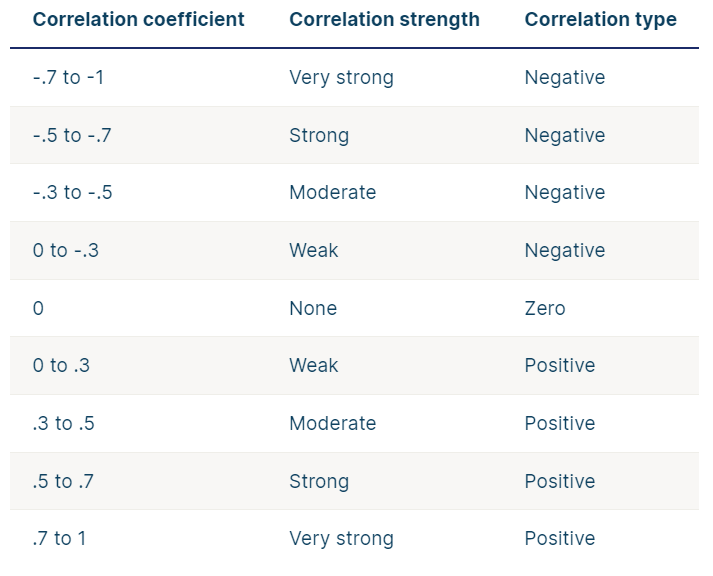

In [93]:
# Get Only The Numerical Columns
df_corr = df[["score", "votes",  "budget", "gross"]]

In [94]:
# Create The Plotly Heat Map
fig = px.imshow(
    df_corr.corr(numeric_only = True), 
    text_auto="0.2f", aspect="auto", template="plotly_dark",
    title="Correlation That Influence the Gross Revenue",
    color_continuous_scale = "earth"
) 

update_layout(showlegend=True, hover_bgcolor="#222", hover_font_size=15)

fig.update_traces(
    textfont = {
        "family": "tahoma",
         "size": 16,
    },
    hovertemplate= "Feature[1]: %{x}<br>Feature[2]: %{y}"
)
iplot(fig)

<h3 style = "background-color: #000;
             padding: 18px;
             font: bold 20px tahoma;
             color: gold;
             border: 3px solid tomato;
             border-radius: 8px">
    ► From The HeatMap, We Can Say 😉🧐
    <BR><HR style = "border: 1px solid #555">
        1) There Is a Very Strong Positive Correlation Between <U>Budget</U> and <U>Gross Revnue</U> (0.75)🔗..
    <BR>
        2) There Is a Strong Positive Correlation Between <U>Votes</U> and <U>Gross Revnue</U> (0.63)🔗

</h3>

In [95]:
fig = px.scatter(
    df, 
    x = df["budget"], 
    y = df["gross"], 
    trendline="ols",
    template="plotly_dark",
    color = df["gross"],
    color_discrete_sequence=["#45FFCA"],
    title = "Relation Between Budget & Gross Revnue",
    labels={"gross" :"Gross Revenue", "budget" :"Budget"},

                 
          )

update_layout(showlegend=True, hover_bgcolor="#222", hover_font_size=15)
fig.update_traces(
    textfont = {
        "family": "tahoma",
         "size": 16,
    },
    hovertemplate= "Budget: %{x:0.3s}<br>Gross Revenue: %{y:0.3s}"
)
iplot(fig)

<h3 style = "background-color: #111;
             padding: 15px;
             font: bold 22px arial;
             color: lightgreen;
             border: 2px solid lime;
             border-radius: 8px">
►► The more budget increases, the more gross revenue expected.</h3>

In [96]:
fig = px.scatter(
    df, 
    x = df["votes"], 
    y = df["gross"], 
    trendline="ols",
    template="plotly_dark",
    color = df["gross"],
    color_discrete_sequence=["#45FFCA"],
    title = "Relation Between Votes & Gross Revenue",
    labels={"gross" :"Gross Revenue", "budget" :"Budget"}
                 
          )

update_layout(showlegend=True, hover_bgcolor="#222", hover_font_size=15)
fig.update_traces(
    textfont = {
        "family": "tahoma",
         "size": 16,
    },
    hovertemplate= "Votes: %{x:0.4s}<br>Gross Revenue: %{y:0.4s}"
)
iplot(fig)

<h3 style = "background-color: #111;
             padding: 15px;
             font: bold 18px arial;
             color: lightgreen;
             border: 2px solid lime;
             border-radius: 8px">
► The number of votes almost refers to the approximate number of people who watched the movie.
<BR>
And the more that number increases, the more revenue.
    </h3>